<a href="https://colab.research.google.com/github/mubina8/aiquest-Assignment/blob/main/Assignment_11_Predicting_Car_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# **Pre-processing Part: Handling Missing Values**

In [ ]:
df['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

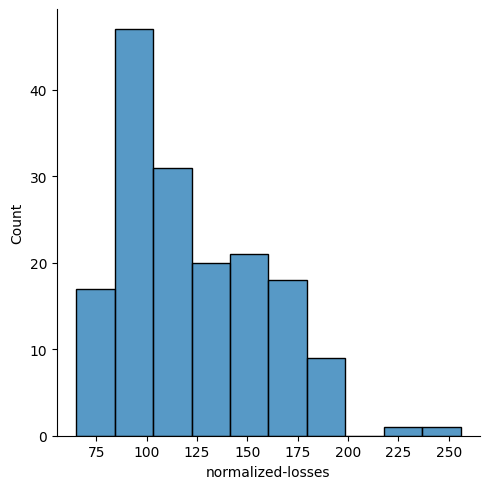

In [ ]:
sns.displot(df['normalized-losses'])

In [ ]:
#Outlier exist so filled NA value with Median
med = df['normalized-losses'].median()
df['normalized-losses']= df['normalized-losses'].fillna(med)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [ ]:
#Handling Catgorical Value with Mode
mode = df['num-of-doors'].mode()[0]
df['num-of-doors'].fillna(mode,inplace=True)

In [ ]:
df['num-of-doors'].isnull().sum()

0

# **Pre-processing Part: Encoding**

In [ ]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
ordinal_make = OrdinalEncoder(categories=[['porsche','jaguar','mercedes-benz','audi','bmw','volvo','saab','alfa-romero','volkswagen','subaru','honda','toyota','nissan','mitsubishi','mazda','renault','isuzu','chevrolet','dodge','plymouth','peugot','mercury']])

In [ ]:
df['make'] = ordinal_make.fit_transform(df[['make']])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,7.0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,7.0,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,7.0,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,3.0,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,3.0,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:

le = LabelEncoder()
df['fuel-type']=le.fit_transform(df['fuel-type'])

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,7.0,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,7.0,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,7.0,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,3.0,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,3.0,1,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
df['aspiration']=le.fit_transform(df['aspiration'])

In [ ]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
ordinal_doors = {'two':2,'four':4}

In [ ]:
df['num-of-doors']=df['num-of-doors'].replace(ordinal_doors)

In [ ]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
body_style = {'sedan':0,'wagon':1,'hatchback':2,'convertible':3,'hardtop':4}

In [ ]:
df['body-style'] = df['body-style'].replace(body_style)

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
ordinal = OrdinalEncoder(categories = [['fwd', 'rwd', '4wd']])
df['drive-wheels'] = ordinal.fit_transform(df[['drive-wheels']])

In [ ]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [ ]:
df['engine-location'] = le.fit_transform(df['engine-location'])

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.loc[1:6,'wheel-base':'fuel-system']

,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system
1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi
2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi
3,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi
4,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi
5,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi
6,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi


In [ ]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [ ]:
ordinal_engine = OrdinalEncoder(categories = [['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf']])
df['engine-type'] = ordinal_engine.fit_transform(df[['engine-type']])

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
num_of_cylinders = {'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}

In [ ]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace(num_of_cylinders)

In [ ]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
ordinal_fuel_system = OrdinalEncoder(categories=[['spfi','mpfi','spdi','1bbl','2bbl','mfi','4bbl','idi']])

In [ ]:
df['fuel-system'] = ordinal_fuel_system.fit_transform(df[['fuel-system']])

# **Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,7.0,1,0,2,3,1.0,0,88.6,...,130,1.0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,7.0,1,0,2,3,1.0,0,88.6,...,130,1.0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,7.0,1,0,2,2,1.0,0,94.5,...,152,1.0,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,3.0,1,0,4,0,0.0,0,99.8,...,109,1.0,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,3.0,1,0,4,0,2.0,0,99.4,...,136,1.0,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.loc[1:6,'wheel-base':'fuel-system']

,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system
1,88.6,168.8,64.1,48.8,2548,0.0,4,130,1.0
2,94.5,171.2,65.5,52.4,2823,1.0,6,152,1.0
3,99.8,176.6,66.2,54.3,2337,2.0,4,109,1.0
4,99.4,176.6,66.4,54.3,2824,2.0,5,136,1.0
5,99.8,177.3,66.3,53.1,2507,2.0,5,136,1.0
6,105.8,192.7,71.4,55.7,2844,2.0,5,136,1.0


In [ ]:
df['normalized-losses'] = scaler.fit_transform(df[['normalized-losses']])

In [ ]:
#df['bore'] = df['bore'].astype(float)
df['bore'].replace('?',np.nan,inplace=True)

In [ ]:
df['bore'].isnull().sum()

4

In [ ]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [ ]:
df['bore'] = df['bore'].astype(float)
df['bore'] = df['bore'].fillna(df['bore'].mean())

In [ ]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [ ]:
df['stroke'].replace('?',np.nan,inplace=True)
df['stroke'] = df['stroke'].astype(float)
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

In [ ]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [ ]:
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower'] = df['horsepower'].astype(float)

In [ ]:
df['horsepower'].value_counts()

68.0     19
69.0     10
116.0     9
70.0      9
110.0     8
95.0      7
114.0     7
101.0     6
62.0      6
88.0      6
76.0      5
97.0      5
82.0      5
84.0      5
145.0     5
160.0     5
102.0     5
123.0     4
111.0     4
86.0      4
92.0      4
90.0      3
73.0      3
207.0     3
85.0      3
182.0     3
121.0     3
152.0     3
112.0     2
56.0      2
161.0     2
94.0      2
156.0     2
52.0      2
162.0     2
155.0     2
176.0     2
184.0     2
100.0     2
55.0      1
134.0     1
115.0     1
140.0     1
48.0      1
58.0      1
60.0      1
78.0      1
262.0     1
175.0     1
135.0     1
64.0      1
120.0     1
72.0      1
154.0     1
143.0     1
142.0     1
200.0     1
106.0     1
Name: horsepower, dtype: int64

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [ ]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '?', '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [ ]:
df['peak-rpm'].replace('?',np.nan,inplace=True)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())

In [ ]:
df['highway-mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [ ]:
"""df['wheel-base'] = scaler.fit_transform(df[['wheel-base']])
df['width'] = scaler.fit_transform(df[['width']])
df['height'] = scaler.fit_transform(df[['height']])
df['curb-weight'] = scaler.fit_transform(df[['curb-weight']])
df['engine-size'] = scaler.fit_transform(df[['engine-size']])
df['bore'] = scaler.fit_transform(df[['bore']])
df['stroke'] = scaler.fit_transform(df[['stroke']])
df['compression-ratio'] = scaler.fit_transform(df[['compression-ratio']])
df['horsepower'] = scaler.fit_transform(df[['horsepower']])
df['peak-rpm'] = scaler.fit_transform(df[['peak-rpm']])
df['city-mpg'] = scaler.fit_transform(df[['city-mpg']])
df['highway-mpg'] = scaler.fit_transform(df[['highway-mpg']])"""

"df['wheel-base'] = scaler.fit_transform(df[['wheel-base']])\ndf['width'] = scaler.fit_transform(df[['width']])\ndf['height'] = scaler.fit_transform(df[['height']])\ndf['curb-weight'] = scaler.fit_transform(df[['curb-weight']])\ndf['engine-size'] = scaler.fit_transform(df[['engine-size']])\ndf['bore'] = scaler.fit_transform(df[['bore']])\ndf['stroke'] = scaler.fit_transform(df[['stroke']])\ndf['compression-ratio'] = scaler.fit_transform(df[['compression-ratio']])\ndf['horsepower'] = scaler.fit_transform(df[['horsepower']])\ndf['peak-rpm'] = scaler.fit_transform(df[['peak-rpm']])\ndf['city-mpg'] = scaler.fit_transform(df[['city-mpg']])\ndf['highway-mpg'] = scaler.fit_transform(df[['highway-mpg']])"

# **Implementing ML Model**

In [ ]:
X = df.loc[:,'symboling':'highway-mpg']
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 1.72741085, -0.17448763, -0.7075331 , ..., -0.24991961,
        -0.64759427, -0.53855178],
       [ 1.72741085, -0.17448763, -0.7075331 , ..., -0.24991961,
        -0.64759427, -0.53855178],
       [ 0.13409125, -0.17448763, -0.7075331 , ..., -0.24991961,
        -0.95979963, -0.68576079],
       ...,
       [-1.45922834, -0.79942559, -1.09909937, ..., -0.66995257,
         0.13291911, -0.53855178],
       [-1.45922834, -0.79942559, -1.09909937, ...,  0.59014631,
        -0.95979963, -0.8329698 ],
       [-1.45922834, -0.79942559, -1.09909937, ...,  0.59014631,
        -0.95979963, -0.8329698 ]])

In [ ]:
y = df['price']
y = np.array(y)

In [519]:
y

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7295,
        7895,  9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250,
       35550, 36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845,
       13645, 15645,  8845,  8495, 10595, 10245, 10795, 11245, 18280,
       18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400,
       16503,  5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869,
       14489,  6989,  8189,  9279,  9279,  5499,  7099,  6649,  6849,
        7349,  7299,  7799,  7499,  7999,  8249,  8949,  9549, 13499,
       14399, 13499, 17199, 19699, 18399, 11900, 13200, 12440, 13860,
       15580, 16900, 16695, 17075, 16630, 17950, 18150,  5572,  7957,
        6229,  6692,  7609,  8921, 12764, 22018, 32528, 34028, 37028,
        9295,  9895,

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=.70)

In [521]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [522]:
data = pd.DataFrame()

In [523]:
data['Actual_Price'] = y_test

In [524]:
data['Predicted_Price'] = reg.predict(X_test)

In [525]:
data.head(10)

,Actual_Price,Predicted_Price
0,8249,8404.807304
1,41315,24199.679785
2,6855,6890.479629
3,8058,9289.431612
4,9980,11945.861797
5,5572,3837.002769
6,35056,26079.123544
7,10898,10032.890523
8,9298,9779.641912
9,35550,33456.875554


In [526]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['Actual_Price'],data['Predicted_Price'])
mse

13546115.135122936

In [527]:
import math
rmse = math.sqrt(mse)
rmse

3680.504739179524

In [529]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data['Actual_Price'],data['Predicted_Price'])
mae

2557.4757658411636

In [530]:
from sklearn.metrics import r2_score
r2_score(y_test,reg.predict(X_test))

0.8489733193067723

# **A higher R-squared value indicates a better fit of the model to the data,I think .84 is quite good score that shown model performs quite better**

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Hyperparameter Tuning:
   - Task: If students are using machine learning models with hyperparameters, they can explore techniques for hyperparameter tuning to optimize the performance of their models.

6. Model evaluation:
- Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.